In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the csv file 'Disney Plus Titles'

In [50]:
df = pd.read_csv('disney_plus_titles.csv')
data1=df
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


# Check shape of Dataframe

In [3]:
df.shape

(1450, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [5]:
df.describe()

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [6]:
df.isna().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(1450, 12)

# Fill NULL Values

In [8]:
df['director'].fillna('None', inplace=True)
df['cast'].fillna('None', inplace=True)
df['country'].fillna('None', inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df.shape

(1444, 12)

# Break into Year ,Month and Day

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [13]:
# Extract year and month for trend analysis
df['year_month'] = df['date_added'].dt.to_period('M')

In [14]:
# Aggregate the number of titles added each month
monthly_titles = df.groupby('year_month').size()

In [15]:
data = df

In [16]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Function to calculate sentiment scores
def get_sentiment(description):
    if isinstance(description, str):
        scores = sid.polarity_scores(description)
        return scores['compound']
    else:
        return None
df['sentiment'] = df['description'].apply(get_sentiment)
df[['title', 'description', 'sentiment']].head()

[nltk_data] Downloading package vader_lexicon to C:\Users\Aayush
[nltk_data]     Mishra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,description,sentiment
0,Duck the Halls: A Mickey Mouse Christmas Special,Join Mickey and the gang as they duck the halls!,0.3595
1,Ernest Saves Christmas,Santa Claus passes his magic bag to a new St. ...,0.0000
2,Ice Age: A Mammoth Christmas,Sid the Sloth is on Santa's naughty list.,0.0000
3,The Queen Family Singalong,"This is real life, not just fantasy!",0.0000
5,Becoming Cousteau,An inside look at the legendary life of advent...,0.2960


# Name of the Columns present in the Dataframe

In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_month', 'sentiment'],
      dtype='object')

In [18]:
df = pd.DataFrame(df['release_year'])
df

,release_year
0,2016
1,1988
2,2011
3,2021
5,2021
...,...
1445,2009
1446,2009
1447,2016
1448,2003


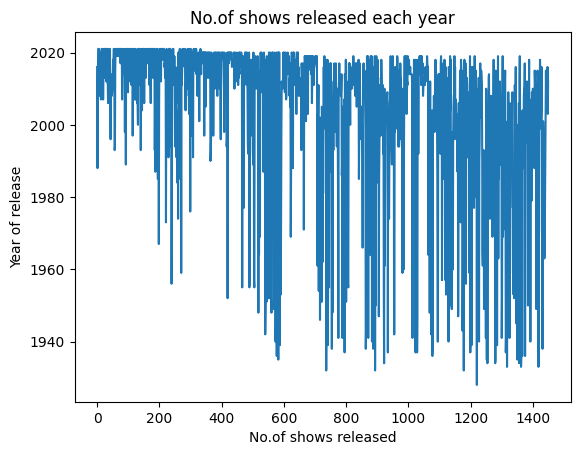

In [19]:
df['release_year'].plot(xlabel='No.of shows released', ylabel='Year of release')
plt.title('No.of shows released each year')
plt.show()

In [20]:
!pip install statsmodels

In [21]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# get the values
release_cycle, release_trend = hpfilter(df['release_year'], lamb = 1200)

In [22]:
release_cycle

0        4.822442
1      -23.774797
2       -1.376055
3        8.034462
5        7.473694
          ...    
1445     8.808760
1446     6.885097
1447    11.946330
1448    -2.996700
1449     4.056888
Name: release_year_cycle, Length: 1444, dtype: float64

In [23]:
release_trend

0       2011.177558
1       2011.774797
2       2012.376055
3       2012.965538
5       2013.526306
           ...     
1445    2000.191240
1446    2002.114903
1447    2004.053670
1448    2005.996700
1449    2007.943112
Name: release_year_trend, Length: 1444, dtype: float64

In [24]:
df['Trend'] = release_trend

# check the release trend

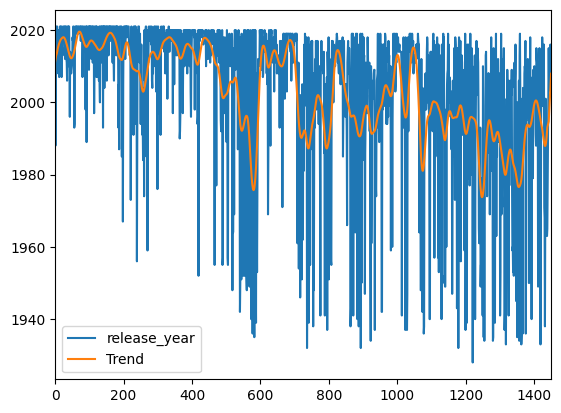

In [25]:
df[['release_year', 'Trend']].plot().autoscale(axis='x', tight=True)

In [51]:
data1.describe()


,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [52]:
data1.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [28]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


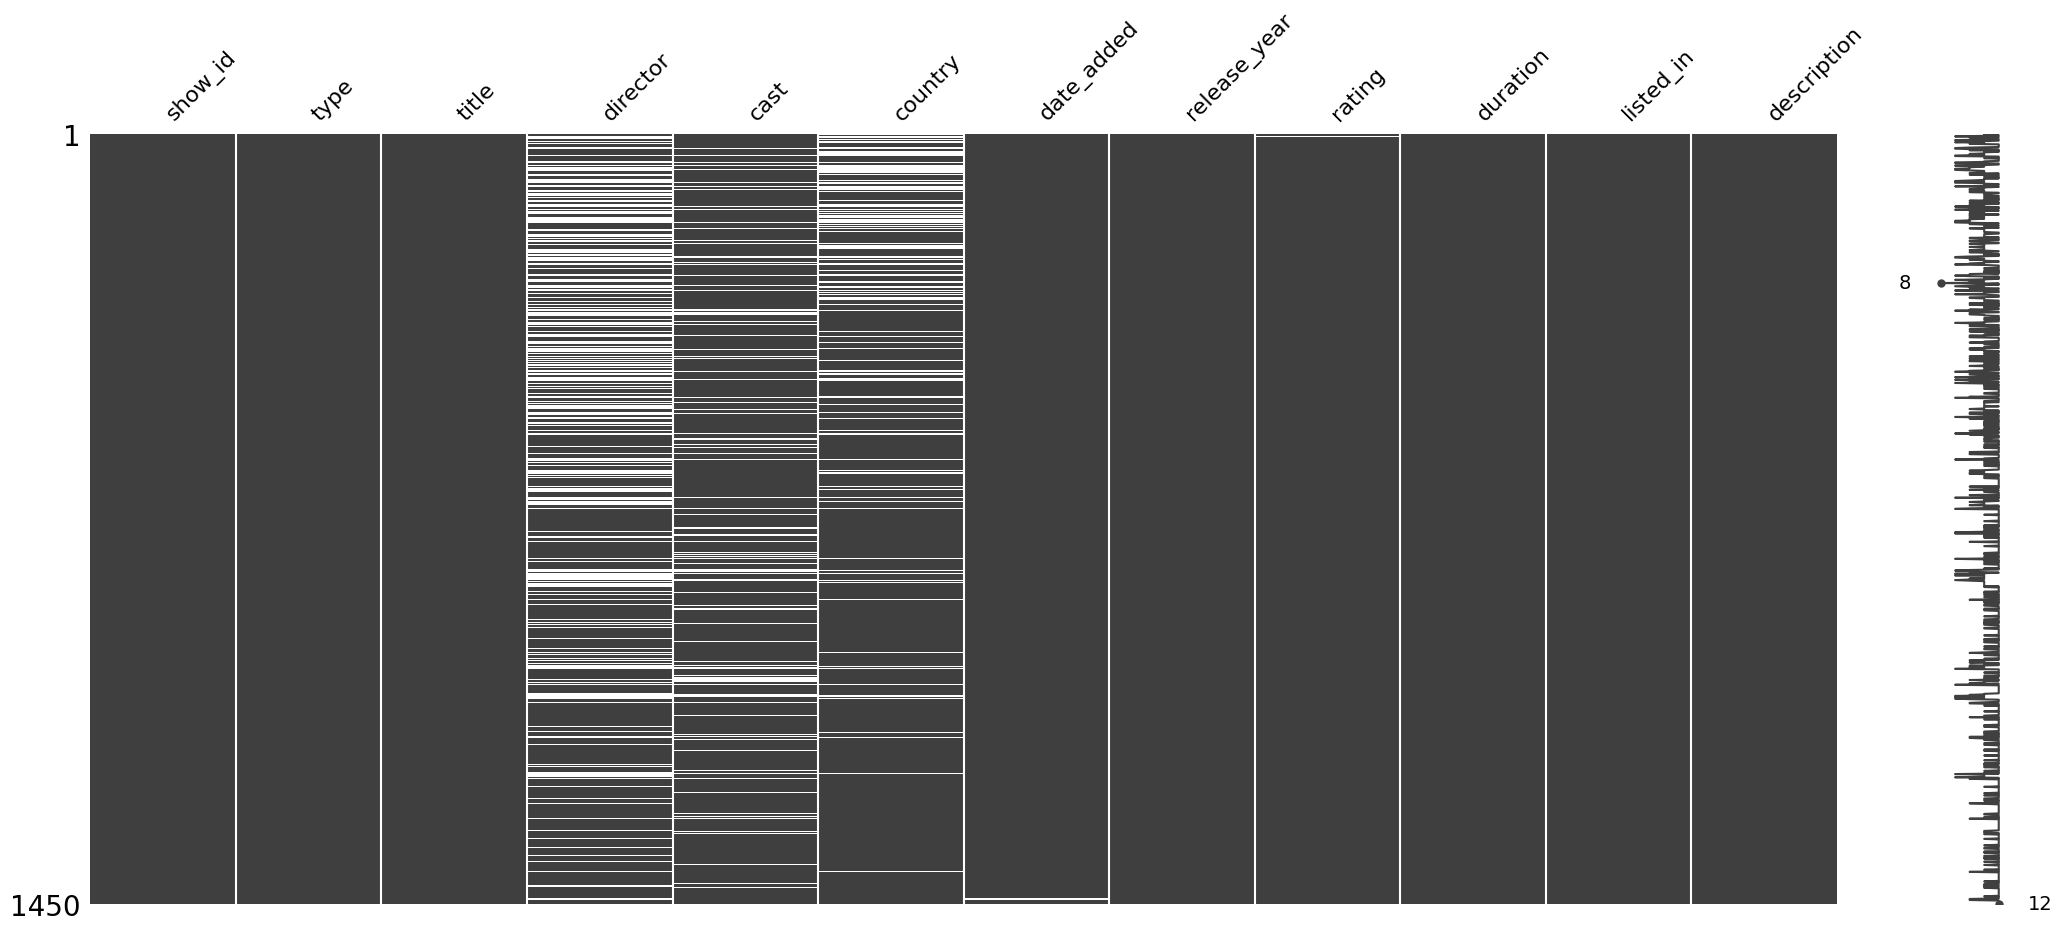

In [53]:
import missingno as msno

msno.matrix(data1)
plt.show()

In [30]:
import plotly.express as px
from pylab import rcParams

# let's check the % of null values



In [54]:
data1.isnull().sum()/len(data1)*100


show_id          0.000000
type             0.000000
title            0.000000
director        32.620690
cast            13.103448
country         15.103448
date_added       0.206897
release_year     0.000000
rating           0.206897
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

# Let's remove the NAN values

In [55]:
data1['director'].fillna('None', inplace=True)
data1['cast'].fillna('None', inplace=True)
data1['country'].fillna('None', inplace=True)

In [61]:
data1.dropna(inplace=True)

In [62]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",None,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",None,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",None,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


In [63]:
data1.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [64]:
data1.duplicated().sum()


0

In [65]:
#(date_added) to (data_time)
data1['date_added'] = pd.to_datetime(data1['date_added'], errors="coerce")
print(f"a. 'date_added' column is in{data1['date_added'].dtype} format")
print(f"a. 'release_year' column is in{data1['release_year'].dtype}format")


a. 'date_added' column is indatetime64[ns] format
a. 'release_year' column is inint64format


In [58]:
data1.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",None,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",None,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",None,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,None,"John Lennon, Paul McCartney, George Harrison, ...",None,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [66]:
#Addintional features(day_added, month_added, year_added)
data1["day_added"] = data1["date_added"].dt.day
data1["month_added"] = data1["date_added"].dt.month_name()
data1["year_added"] = data1["date_added"].dt.year
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",None,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,26,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",None,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,26,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,26,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",None,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",26,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,24,November,2021


# Let's count Movies and TV shows

In [40]:
data1['type'].value_counts().reset_index()


,index,type
0,Movie,1051
1,TV Show,393


In [41]:
#Visualisation 
fig = px.pie(data1, values=data1["type"].value_counts().values, names=data1["type"].value_counts().index)

fig.update_layout(title = "Content Types Over the Years", plot_bgcolor="rgba(255,255,255,0.5)",paper_bgcolor='grey',font=dict(color='white'))
fig.show()

In [42]:
fig = px.bar(x=data1["type"].value_counts().index,
             y=data1["type"].value_counts().values,
             color=data1["type"].value_counts().index)
##
fig.update_layout(
    title={
        'text': "Content Types Over the Years",
        'font': {'color': 'yellow'}
    },
    
    xaxis_title={
        'text': "Types of Content",
        'font': {'color': 'yellow'}
    },
    
    yaxis_title={
        'text': "Counts",
        'font': {'color':'yellow'}
    },
    
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='grey',
    font=dict(color='white')
)


fig.show()

# Let's see the release years of movies and shows

In [43]:
data1['release_year'].unique()

array([2016, 1988, 2011, 2021, 2015, 2019, 2008, 2020, 2007, 2013, 2018,
       2014, 2012, 2006, 2010, 1996, 2009, 2017, 1993, 1994, 1998, 1989,
       1997, 2005, 2000, 2004, 1987, 1985, 1967, 1973, 1991, 1956, 1995,
       1984, 1974, 1959, 2003, 1976, 2001, 1990, 1992, 1952, 1955, 1977,
       1957, 1999, 1948, 1964, 1969, 1942, 1950, 1951, 1953, 1949, 1940,
       1946, 1954, 1936, 1944, 1935, 1939, 1975, 1978, 2002, 1971, 1961,
       1962, 1981, 1932, 1938, 1941, 1986, 1947, 1937, 1966, 1943, 1934,
       1980, 1960, 1983, 1972, 1982, 1979, 1928, 1965, 1970, 1963, 1933,
       1945, 1968], dtype=int64)

In [44]:
#Visualisation 
fig = px.bar(x=data1["release_year"].value_counts().index,
             y=data1["release_year"].value_counts().values,
             color=data1["release_year"].value_counts().index)
##
fig.update_layout(
    title={
        'text': "Most Release Years for Movies and TV Shows",
        'font': {'color': 'yellow'}
    },
    
    xaxis_title={
        'text': "Release Years",
        'font': {'color': 'yellow'}
    },
    
    yaxis_title={
        'text': "Counts",
        'font': {'color':'yellow'}
    },
    
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='grey',
    font=dict(color='yellow')
)


fig.show()

In [45]:
data1['rating'].value_counts().reset_index()

,index,rating
0,TV-G,318
1,TV-PG,301
2,G,253
3,PG,236
4,TV-Y7,129
5,TV-14,79
6,PG-13,66
7,TV-Y,49
8,TV-Y7-FV,13


# Pie chart of Highest Rating For Movie and Tv Shows

In [67]:
##Visualisation 
fig = px.pie(data1, values=data1['rating'].value_counts().values, names=data1['rating'].value_counts().index)

fig.update_layout(title = "Highest Rating For Movie and Tv Shows", plot_bgcolor="rgba(255,255,255,0.5)",paper_bgcolor='grey',font=dict(color='white'))
fig.show()

In [47]:
fig = px.bar(x=data1["rating"].value_counts().index,
             y=data1["rating"].value_counts().values,
             color=data1["rating"].value_counts().index)
##
fig.update_layout(
    title={
        'text': "Highest Rating For Movie and Tv Shows",
        'font': {'color': 'yellow'}
    },
    
    xaxis_title={
        'text': "Highest Rating",
        'font': {'color': 'yellow'}
    },
    
    yaxis_title={
        'text': "Counts",
        'font': {'color':'yellow'}
    },
    
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='grey',
    font=dict(color='white')
)


fig.show()

# Let's see the numbers of directors

In [49]:
directors = data1.groupby(['director', 'type'])['director'].value_counts()
directors

director                     type   director                   
Aaron Blaise, Robert Walker  Movie  Aaron Blaise, Robert Walker    1
Adam Shankman                Movie  Adam Shankman                  3
Adam Stein, Zach Lipovsky    Movie  Adam Stein, Zach Lipovsky      1
Alan Barillaro               Movie  Alan Barillaro                 1
Alan Shapiro                 Movie  Alan Shapiro                   1
                                                                  ..
Zach A. Parrish              Movie  Zach A. Parrish                1
Zak Knutson                  Movie  Zak Knutson                    1
Zhong Yu                     Movie  Zhong Yu                       1
Érik Canuel                  Movie  Érik Canuel                    1
朱家欣 , 钟智行                    Movie  朱家欣 , 钟智行                      1
Name: director, Length: 611, dtype: int64

In [ ]:

#let's see the top 10 directors
data1[['director', 'type']].groupby('director')['type'].count().nlargest(10)

director
None                468
Jack Hannah          17
John Lasseter        16
Paul Hoen            16
Charles Nichols      12
Robert Stevenson     12
Bob Peterson         10
Vincent McEveety     10
James Algar           9
Kenny Ortega          9
Name: type, dtype: int64

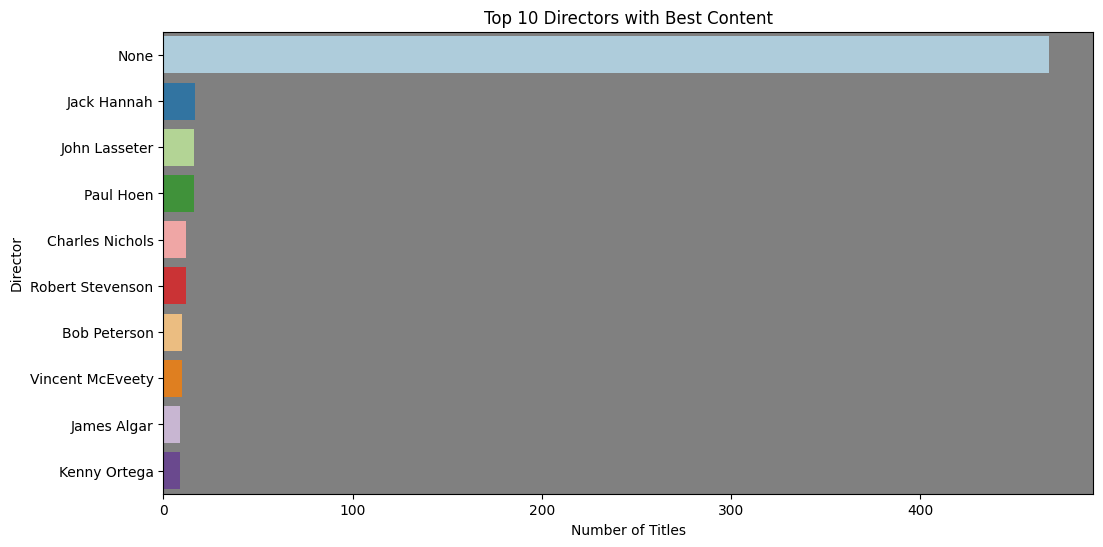

In [ ]:
##Visualisation 
import seaborn as sns
plt.figure(figsize=(12, 6))
top_directors = df["director"].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index,palette='Paired')
plt.title('Top 10 Directors with Best Content')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.gca().set_facecolor('grey')
plt.show()

# Let's see, which country produce's the most number of content on Disney

In [ ]:
grouped_data = data1.groupby(['type', 'country']).size().reset_index(name='count')
grouped_data

,type,country,count
0,Movie,"Australia, United States",3
1,Movie,"Austria, South Africa",1
2,Movie,"Austria, United Kingdom, United States",1
3,Movie,Canada,3
4,Movie,"Canada, Malaysia, United States",1
...,...,...,...
95,TV Show,"United States, South Korea, China, Taiwan",1
96,TV Show,"United States, South Korea, France",1
97,TV Show,"United States, Taiwan, South Korea, China, Jap...",1
98,TV Show,"United States, United Kingdom",2


In [ ]:
grouped_data = data1.groupby(['type', 'country']).size().reset_index(name='count')
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data = grouped_data.head(20)

fig = px.bar(grouped_data, x='country', y='count', color='country',
             title="Countris Produces Highest level of Content",
             labels={'country': "Country", 'count': "Count"},
             color_discrete_map={'United States': 'red', 'India': 'blue'})

fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='grey',
    font=dict(color='yellow')
)
fig.show()

# let's see the duration of Movies and TV shows

In [ ]:
grouped_data = data1.groupby(['type', 'duration']).size().reset_index(name='count')

grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,type,duration,count
145,TV Show,1 Season,217
149,TV Show,2 Seasons,81
150,TV Show,3 Seasons,43
112,Movie,7 min,42
85,Movie,44 min,42
...,...,...,...
61,Movie,175 min,1
98,Movie,56 min,1
59,Movie,169 min,1
58,Movie,162 min,1


In [ ]:
#Visualisation
fig = px.bar(grouped_data, x='duration', y='count', color='type',
             title="length of Movies and Tv Show",
             labels={'duration': "Duration", 'count': "Count"},
             color_discrete_map={'Short' : 'red', 'long': 'blue'})
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='grey',
    font=dict(color='yellow')
)

# let's see the cast

In [ ]:
data1['cast'].value_counts().reset_index()


,index,cast
0,None,189
1,Winston Hibler,10
2,Dan Nachtrab,7
3,"Larry the Cable Guy , Keith Ferguson",6
4,Russell Boulter,6
...,...,...
1184,"Tony Goldwyn, Minnie Driver, Glenn Close, Alex...",1
1185,"Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",1
1186,"Walt Disney, Paul Frees, Dr. Ernst Stuhlinger,...",1
1187,"Walt Disney, Dick Tufeld, Ward Kimball, Willy ...",1


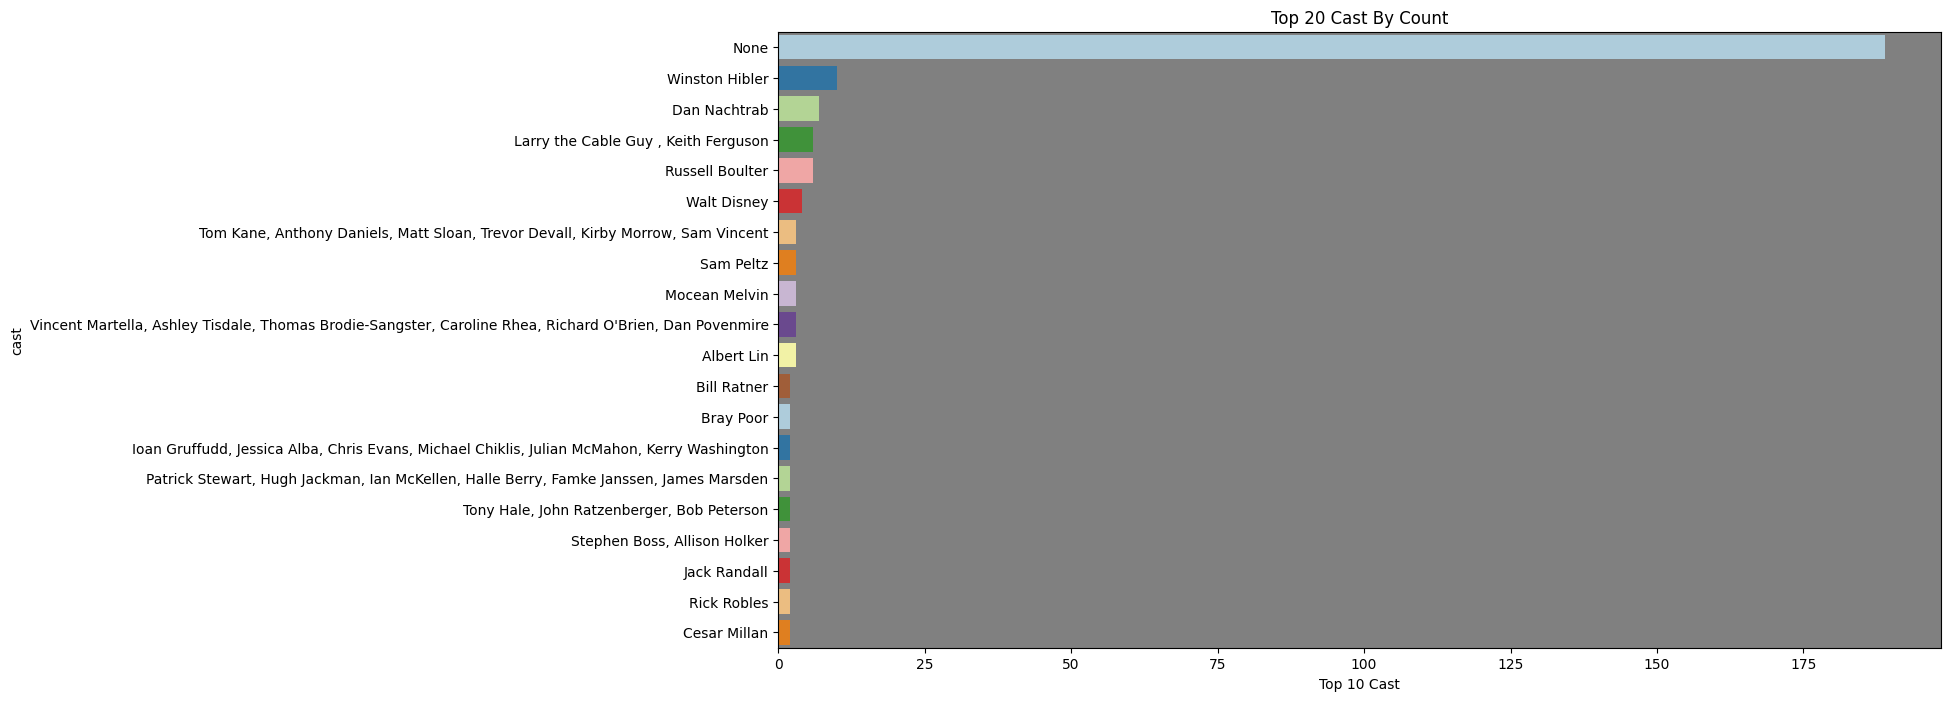

In [ ]:
##Visualisation 
plt.figure(figsize=(15, 8))
top_directors = data1["cast"].value_counts().head(20)
sns.barplot(x=top_directors.values, y=top_directors.index,palette='Paired')
plt.title("Top 20 Cast By Count",)
plt.xlabel('Top 10 Cast')
plt.ylabel('cast')
paper_bgcolor='grey',
plot_bgcolor='rgba(0,0,0,0)'
plt.gca().set_facecolor('grey')
plt.show()

# Let's see Listed in columns

In [ ]:
data1['listed_in'].value_counts().reset_index()

,index,listed_in
0,"Animation, Comedy, Family",124
1,"Action-Adventure, Animation, Comedy",77
2,"Action-Adventure, Animation, Kids",45
3,"Animals & Nature, Documentary, Family",40
4,"Action-Adventure, Animation, Family",40
...,...,...
323,"Biographical, Coming of Age, Drama",1
324,"Docuseries, Family, Lifestyle",1
325,"Comedy, Fantasy, Romance",1
326,"Buddy, Comedy, Drama",1


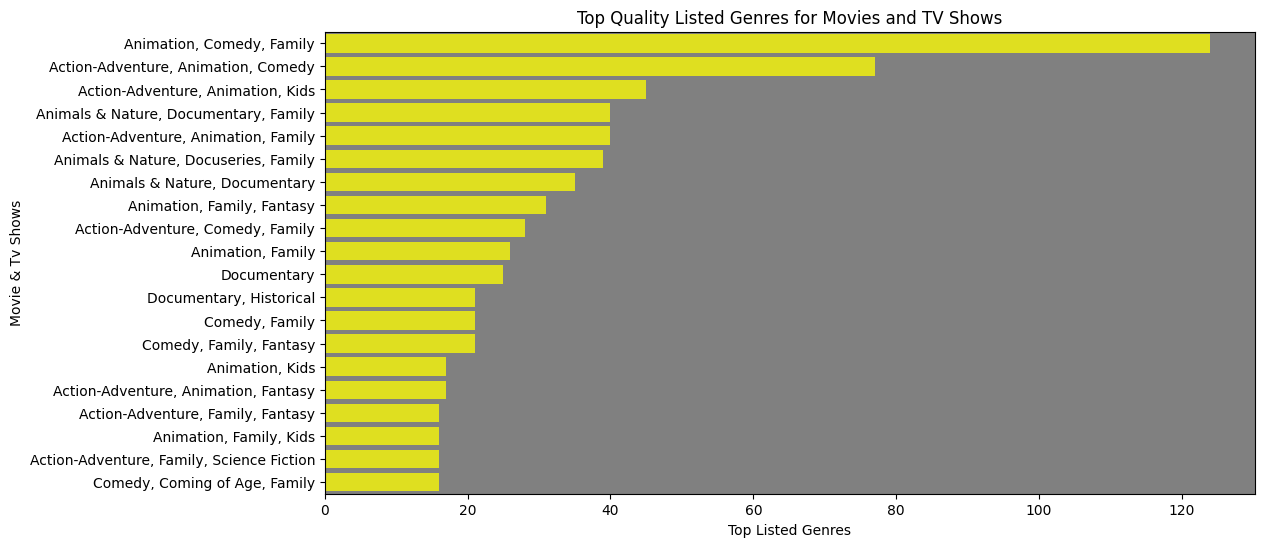

In [ ]:
#Visualisation 
plt.figure(figsize=(12,6))
top_genres = data1['listed_in'].value_counts().head(20)
sns.barplot(x=top_genres.values, y=top_genres.index, color='yellow')
plt.title('Top Quality Listed Genres for Movies and TV Shows')
plt.xlabel('Top Listed Genres')
plt.ylabel('Movie & Tv Shows')
plt.gca().set_facecolor('grey')
plt.show()

In [ ]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'month_added', 'year_added'],
      dtype='object')

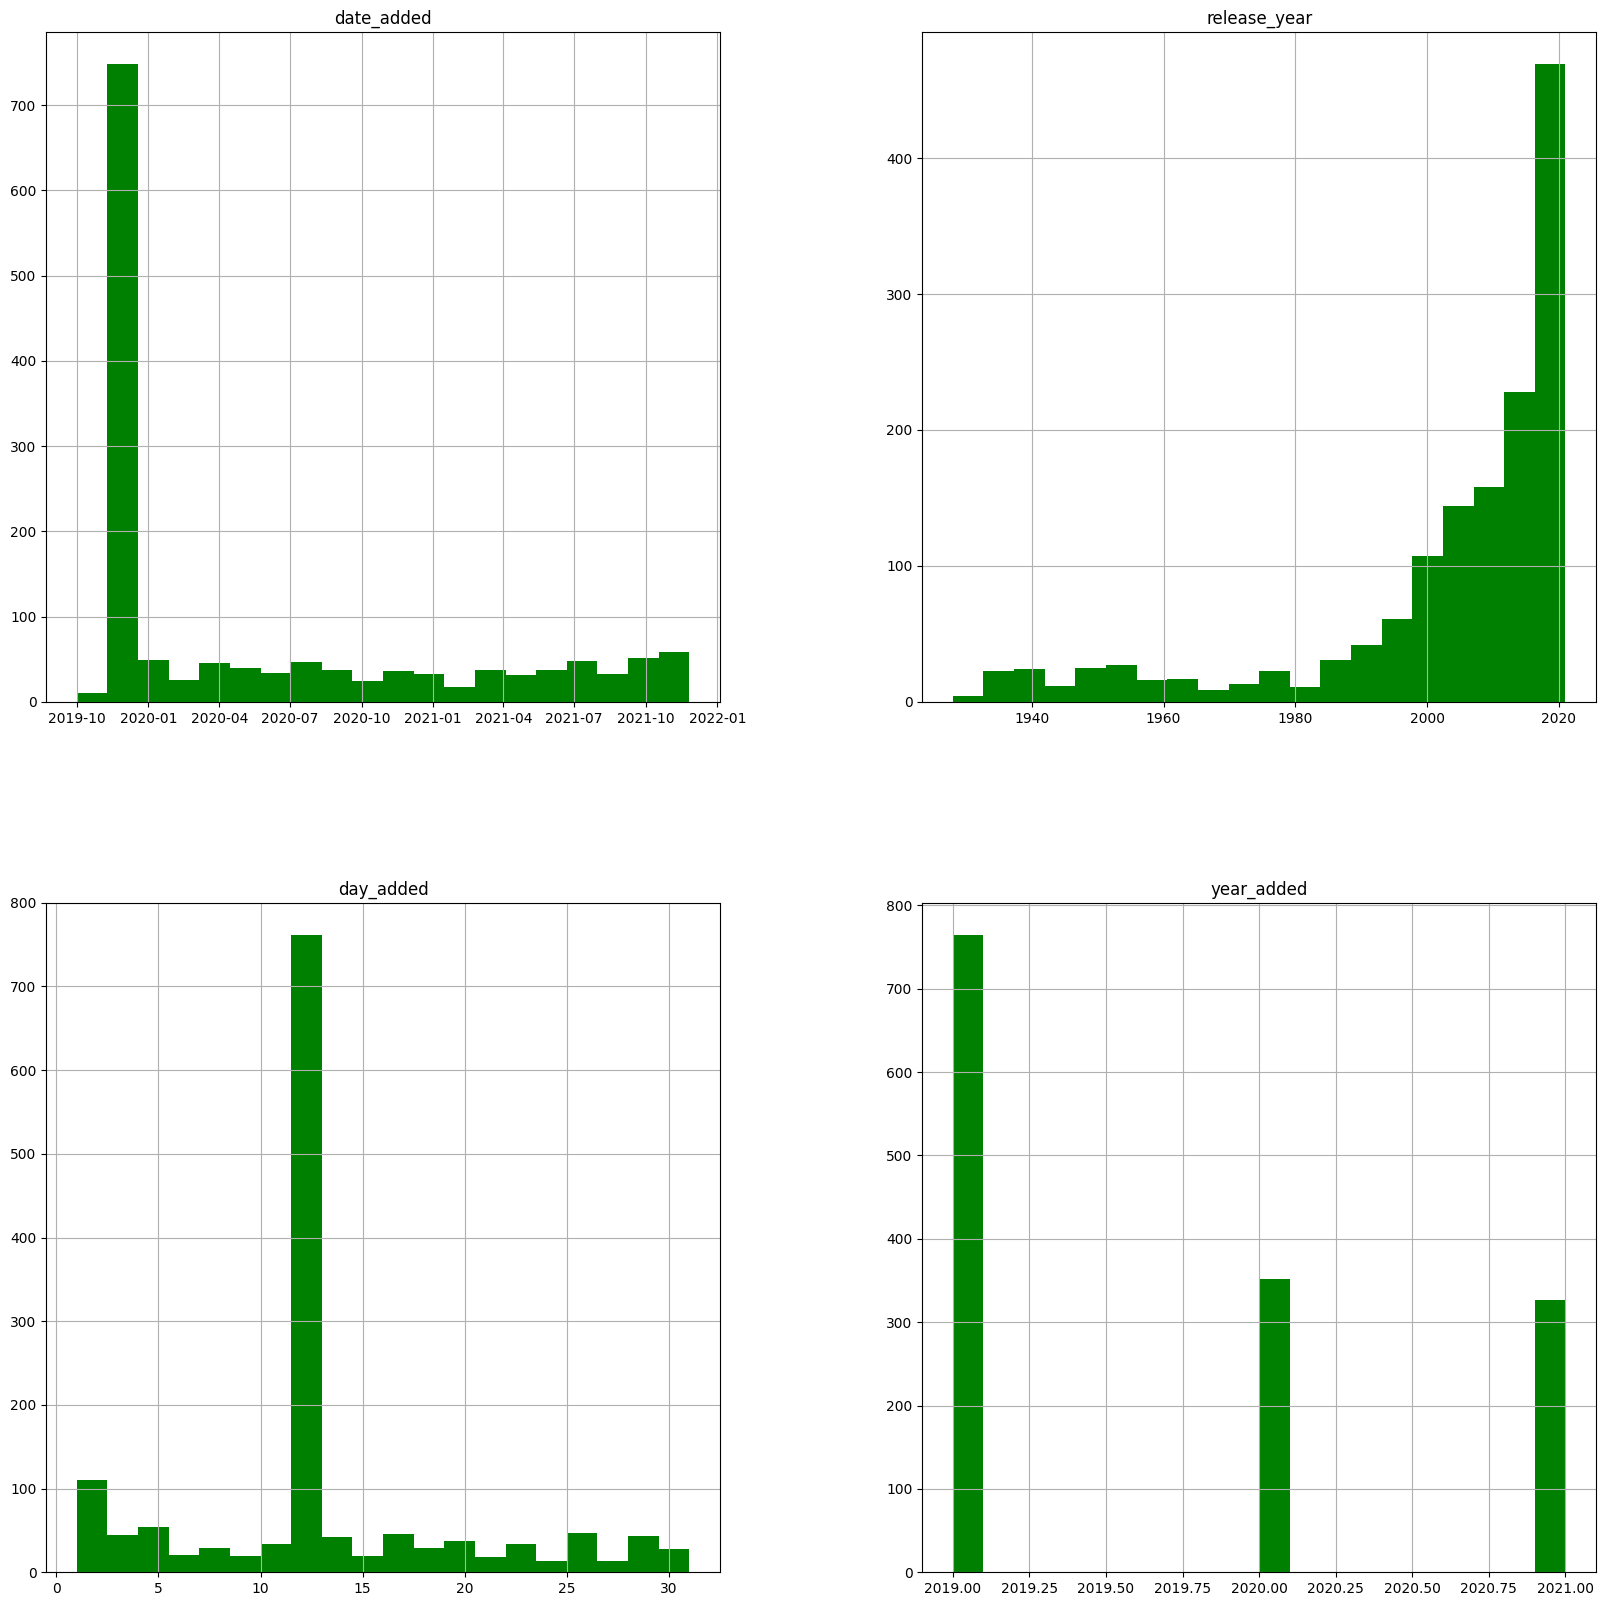

In [ ]:
data1.hist(bins =20, figsize = (20, 20), color = 'green')
plt.show()

In [ ]:
data1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",None,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,26,November,2021
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",None,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,26,November,2021
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,26,November,2021
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",None,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",26,November,2021
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,24,November,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...,4,June,2021
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...,2,April,2021
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum...",18,December,2020
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...,18,September,2020


# Word Cloud

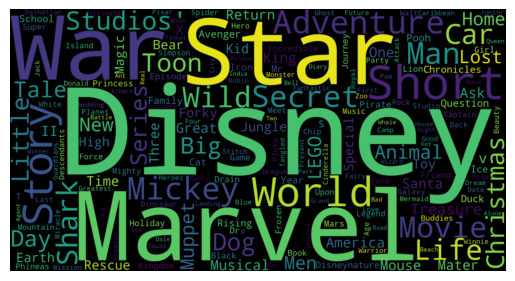

In [ ]:
from wordcloud import WordCloud

# creating the text variable
text1 = " ".join(title for title in data1.title)
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'black',
                        width = 2048, height = 1080).generate(text1)
# saving the image
#word_cloud1.to_file('got.png')
# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generes

(-0.5, 799.5, 399.5, -0.5)

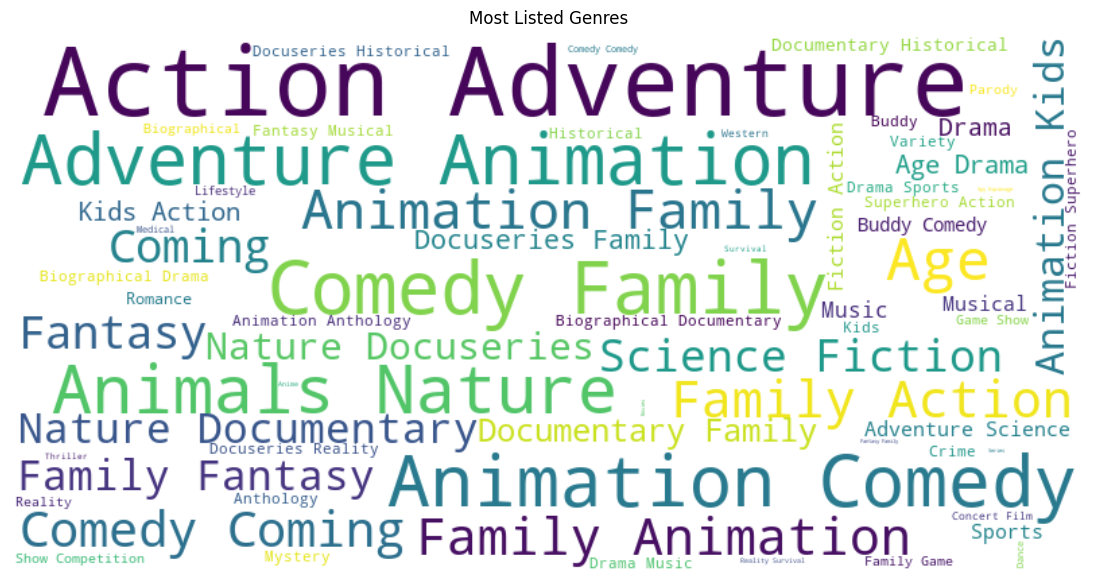

In [ ]:
##Listed_in
from wordcloud import WordCloud

reviews_text = ' '.join(listed_in for listed_in in data1.listed_in)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(reviews_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Listed Genres')
plt.axis('off')

# Director's

(-0.5, 799.5, 399.5, -0.5)

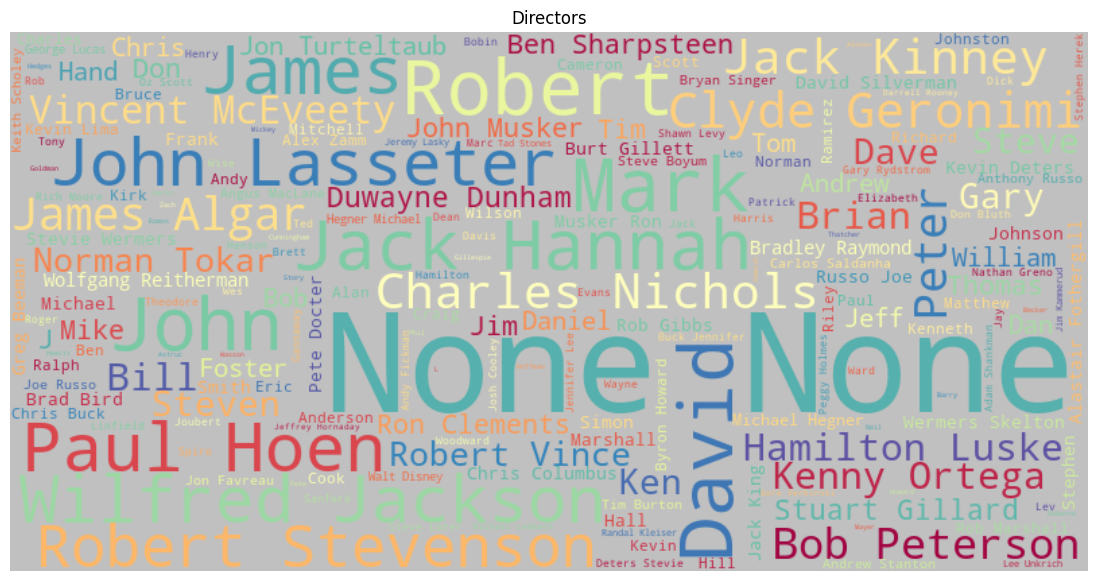

In [ ]:
reviews_text = ' '.join(directors for directors in data1.director)
wordcloud = WordCloud(width=800, height=400, background_color='silver', colormap='Spectral').generate(reviews_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Directors')
plt.axis('off')


# Country


(-0.5, 799.5, 399.5, -0.5)

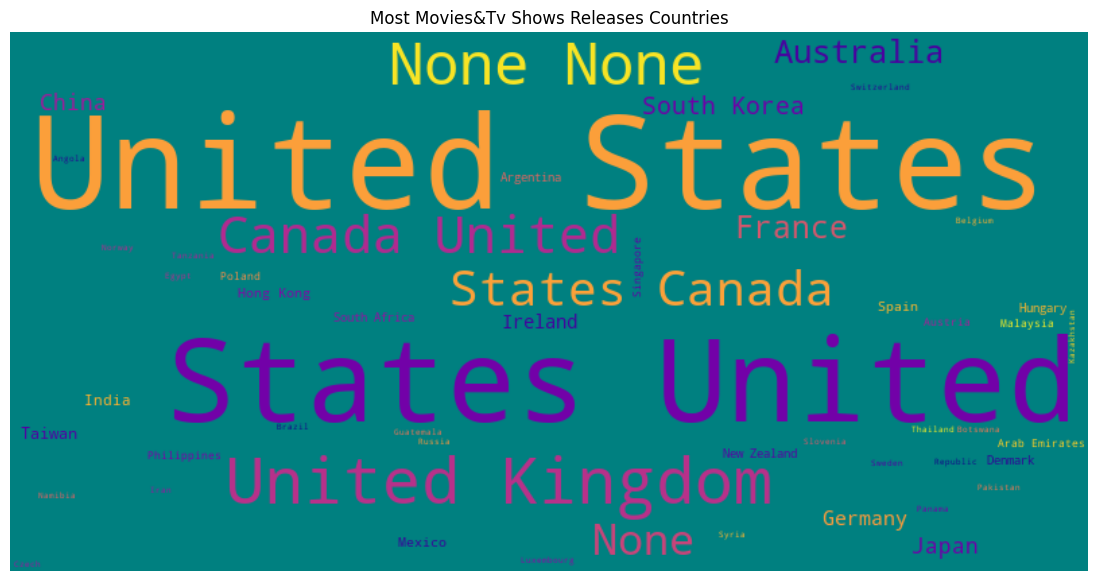

In [ ]:
reviews_text = ' '.join(country for country in data1.country)
wordcloud = WordCloud(width=800, height=400, background_color='teal', colormap='plasma').generate(reviews_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Movies&Tv Shows Releases Countries')
plt.axis('off')

# Title's

(-0.5, 799.5, 399.5, -0.5)

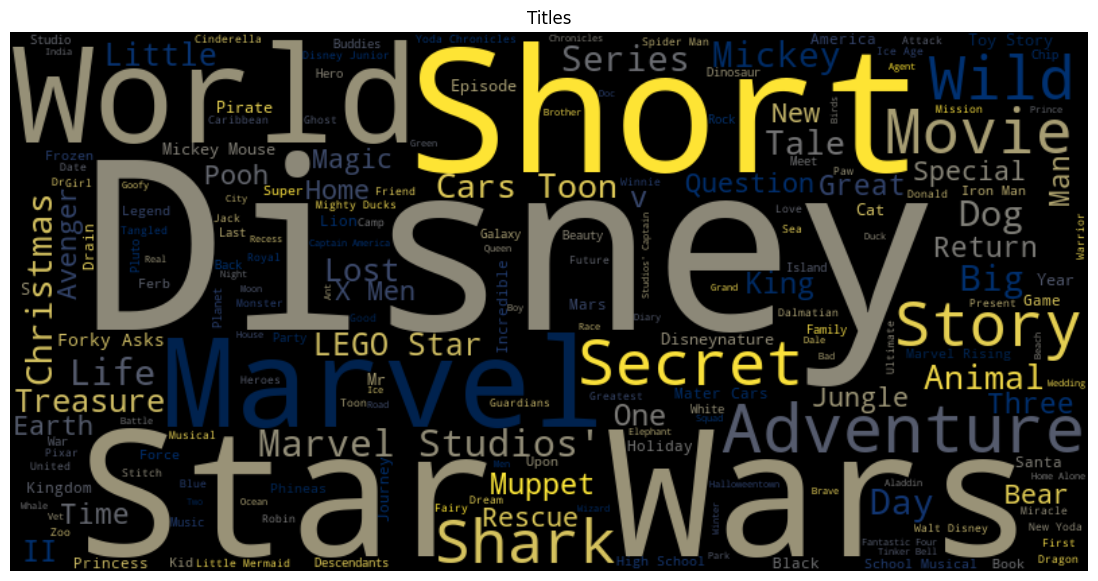

In [ ]:
reviews_text = ' '.join(title for title in data1.title)
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='cividis').generate(reviews_text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Titles')
plt.axis('off')